In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import requests
from io import BytesIO
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

wind_df = pd.read_csv('wind_daily_agg.csv')
wind_df['Date_Time'] = pd.to_datetime(wind_df['Date_Time'])
wind_df.Electricity_KW_HR_AVG = np.log(wind_df.Electricity_KW_HR_AVG)
wind_df.rename(columns={'Electricity_KW_HR_AVG':'Electricity_Log'}, inplace=True)

In [2]:
wind_df.head(2)

,Date_Time,Weekend,Electricity_Log,Wind_Speed_AVG,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Spring,Season_Summer,Season_Winter
0,2011-03-25,0,7.671206,3.308333,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2011-03-26,1,8.802472,4.987500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [3]:
time = wind_df[['Date_Time', 'Electricity_Log']]
del wind_df['Date_Time']
del wind_df['Electricity_Log']
wind_df.head()

,Weekend,Wind_Speed_AVG,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Spring,Season_Summer,Season_Winter
0,0,3.308333,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,4.987500,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,4.391667,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,3.808333,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,3.383333,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [4]:
scaler = MinMaxScaler()
scaler.fit(wind_df)

exo = pd.DataFrame(scaler.transform(wind_df))

C:\Users\sajor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
train_time = np.array(time.Electricity_Log[0:514])
test_time = np.array(time.Electricity_Log[514:])
train_exo = np.array(exo[0:514])
test_exo = np.array(exo[514:])

In [6]:
train_time.shape

(514,)

In [7]:
train_exo.shape

(514, 52)

In [8]:
model = SARIMAX(train_time, exog=train_exo, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))

In [9]:
model_fit = model.fit(disp=True)

In [10]:
test_exo.shape

(128, 52)

In [11]:
fc = model_fit.forecast(128, alpha=0.05, exog = pd.DataFrame(test_exo) )

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  514
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -152.628
Date:                Thu, 31 Oct 2019   AIC                            413.256
Time:                        00:34:28   BIC                            642.336
Sample:                             0   HQIC                           503.041
                                - 514                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1520      0.067     46.886      0.000       3.020       3.284
x2             5.8398      0.090     65.154      0.000       5.664       6.015
x3             1.8931      0.145     13.028      0.000       1.608       2.178
x4             2.2442      0.161     13.953      0.000       1.929       2.559
x5             2.1919      0.126     17.383      0.000       1.945       2.439
x6             2.2914      0.135     16.925      0.000       2.026       2.557
x7             2.3208      0.142     16.325      0.000       2.042       2.599
x8             2.2873      0.130     17.646      0.000       2.033       2.541
x9             2.1568      0.139     15.472      0.000       1.884       2.430
x10            2.2658      0.150     15.059      0.000       1.971       2.561
x11            2.2846      0.129     17.655      0.000       2.031       2.538
x12            2.2285      0.101     21.995      0.000       2.030       2.427
x13            2.3139      0.129     17.896      0.000       2.060       2.567
x14            2.0235      0.102     19.759      0.000       1.823       2.224
x15           -0.1538      0.090     -1.709      0.087      -0.330       0.023
x16           -0.0919      0.107     -0.862      0.389      -0.301       0.117
x17           -0.1961      0.084     -2.331      0.020      -0.361      -0.031
x18            0.0114      0.165      0.069      0.945      -0.312       0.335
x19           -0.0896      0.104     -0.861      0.389      -0.293       0.114
x20            0.0462      0.106      0.435      0.664      -0.162       0.254
x21            0.0390      0.152      0.256      0.798      -0.260       0.338
x22            0.0349      0.114      0.306      0.760      -0.189       0.258
x23            0.0349      0.166      0.211      0.833      -0.290       0.360
x24           -0.0317      0.105     -0.302      0.763      -0.237       0.174
x25            0.0308      0.163      0.189      0.850      -0.289       0.351
x26           -0.2779      0.067     -4.156      0.000      -0.409      -0.147
x27           -0.1568      0.089     -1.765      0.078      -0.331       0.017
x28            0.0505      0.118      0.426      0.670      -0.182       0.283
x29            0.1008      0.145      0.696      0.486      -0.183       0.384
x30           -0.0030      0.144     -0.021      0.984      -0.286       0.280
x31           -0.0491      0.100     -0.489      0.625      -0.246       0.148
x32           -0.1234      0.120     -1.028      0.304      -0.359       0.112
x33           -0.0159      0.130     -0.123      0.902      -0.271       0.239
x34            0.0424      0.145      0.293      0.770      -0.241       0.326
x35           -0.0013      0.112     -0.011      0.991      -0.222       0.219
x36            0.0513      0.168      0.305      0.760      -0.278       0.380
x37           -0.0145      0.135     -0.107      0.915      -0.279       0.250
x38           -0.0505      0.120     -0.420      0.674      -0.286       0.185
x3

In [13]:
fc

array([10.01714279,  8.75928724,  9.1627466 ,  8.73923167,  8.80174035,
       10.1561891 ,  7.49151775,  8.14514646,  7.46132649,  7.78889877,
        8.69029274,  7.87426616,  8.3018446 ,  7.45118046,  8.9493211 ,
        8.77148188,  9.1708896 ,  8.69765653,  8.09835075,  9.55280467,
        8.36534933,  8.84197555,  8.65919991,  8.88651947,  8.76404684,
        8.48776791,  7.9944148 ,  8.47096723,  9.63962463, 11.1685926 ,
       10.65084173, 10.09607319,  9.05575321,  9.72747839,  9.07119769,
        8.29216123,  9.27078111,  9.04120436, 10.25848206,  9.58068933,
       10.6016848 ,  9.16258936,  7.93426669,  8.64900485,  8.03256163,
        8.62964179,  9.06176829, 10.11179666,  9.62942684,  8.10262715,
        9.51423161, 10.06692309, 10.45155226, 10.22412712,  9.6770197 ,
        8.27063161,  8.16715785,  8.35694826,  7.84758548,  7.88251632,
        8.20405031,  9.83032525,  9.01461389,  8.42393258,  9.8400945 ,
        8.65161752,  9.19919556, 10.5932656 , 10.56727238,  9.60

In [14]:
test_time

array([10.14430729,  8.84572926,  9.33885085,  9.05050412,  9.27714196,
       10.15673992,  7.1207138 ,  7.98690155,  6.9858429 ,  7.45259578,
        8.93890341,  7.9649088 ,  7.97252349,  6.3727508 ,  8.95886164,
        8.91742239,  9.27342471,  8.72961278,  8.53066865,  9.77083197,
        8.05203116,  8.83178493,  8.49409514,  9.02380997,  8.99046232,
        8.53112897,  7.93020621,  8.46954238,  9.84975268, 10.47897669,
       10.46251745, 10.18906115,  9.37176454,  9.59873844,  9.12521812,
        8.48263625,  9.59472938,  9.44274755, 10.42066297,  9.8777423 ,
       10.38602172,  9.65627541,  7.81594663,  8.91388661,  8.16151775,
        8.93342238,  9.44604471, 10.12285733,  9.99959287,  8.92154657,
        9.67647193, 10.1982011 , 10.37396503, 10.31088413,  9.86877533,
        8.88324735,  8.18200014,  8.4994704 ,  7.86294616,  8.29949313,
        8.54480836,  9.9912313 ,  9.24498332,  8.75804568,  9.98152055,
        9.219746  ,  9.6365989 , 10.55531782, 10.43867403,  9.90

In [15]:
np.exp(fc)

array([ 22407.31605103,   6369.56998678,   9535.21058485,   6243.09709279,
         6645.79994557,  25749.97922828,   1792.77100279,   3446.61015184,
         1739.45390305,   2413.6581336 ,   5944.92233414,   2628.75638963,
         4031.3016773 ,   1721.8945688 ,   7702.66076677,   6447.72011482,
         9613.17272753,   5988.86102745,   3289.03915074,  14084.14074532,
         4295.61207756,   6918.64725452,   5762.92196301,   7233.79786762,
         6399.95882652,   4855.01714802,   2964.3551413 ,   4774.13089825,
        15361.57640684,  70869.29893007,  42228.12440936,  24247.60645624,
         8567.68808963,  16772.20595828,   8701.03870349,   3992.45349876,
        10623.04637553,   8443.94044118,  28523.45645323,  14482.39894534,
        40202.51347953,   9533.71133913,   2791.31109853,   5704.46709675,
         3079.6204252 ,   5595.07368989,   8619.37873477,  24631.87623313,
        15205.71836952,   3303.13452049,  13551.21659561,  23550.98880825,
        34598.0383201 ,  

In [16]:
np.exp(test_time)

array([25445.83333  ,  6944.666667 , 11371.33333  ,  8522.833333 ,
       10690.83333  , 25764.16667  ,  1237.333333 ,  2942.166667 ,
        1081.217391 ,  1724.333333 ,  7622.833333 ,  2878.166667 ,
        2900.166667 ,   585.6666667,  7776.5      ,  7460.833333 ,
       10651.16667  ,  6183.333333 ,  5067.833333 , 17515.33333  ,
        3140.166667 ,  6848.5      ,  4885.833333 ,  8298.333333 ,
        8026.166667 ,  5070.166667 ,  2780.       ,  4767.333333 ,
       18953.66667  , 35560.       , 34979.5      , 26610.5      ,
       11751.83333  , 14746.16667  ,  9184.       ,  4830.166667 ,
       14687.16667  , 12616.33333  , 33545.66667  , 19491.66667  ,
       32403.5      , 15619.5      ,  2479.833333 ,  7434.5      ,
        3503.5      ,  7581.166667 , 12658.       , 24905.83333  ,
       22017.5      ,  7491.666667 , 15938.16667  , 26854.83333  ,
       32015.16667  , 30058.       , 19317.66667  ,  7210.166667 ,
        3576.       ,  4912.166667 ,  2599.166667 ,  4021.8333

In [17]:
actual = pd.DataFrame(np.exp(test_time))
actual.index = time.Date_Time[514:]
forecast = pd.DataFrame(np.exp(fc))
forecast.index = actual.index
train= pd.DataFrame(np.exp(train_time))
train.index = time.Date_Time[:514]




C:\Users\sajor\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


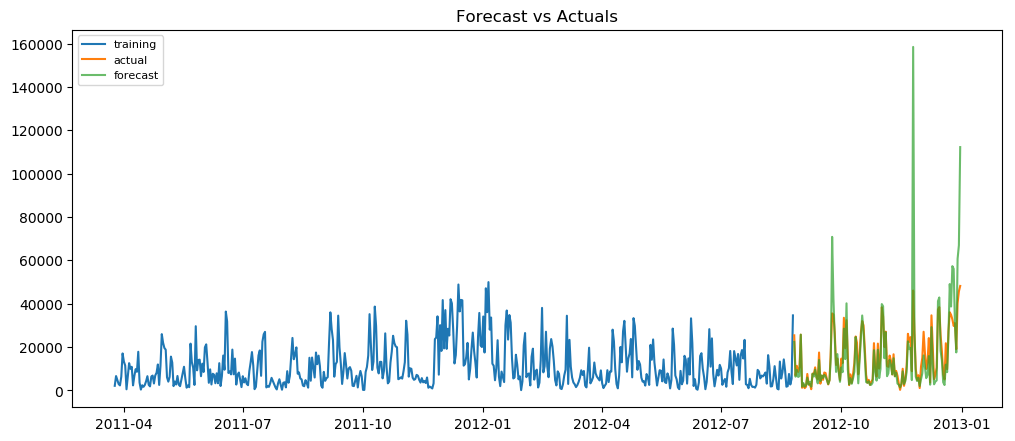

In [18]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
rmse

13058.051523710838

In [20]:
mx = max(time.Electricity_Log)

In [21]:
fc2 = []
for v in fc:
    if v > mx:
        v = mx
    fc2.append(v)
        
forecast2 = pd.DataFrame(np.exp(fc2))
forecast2.index = actual.index
        

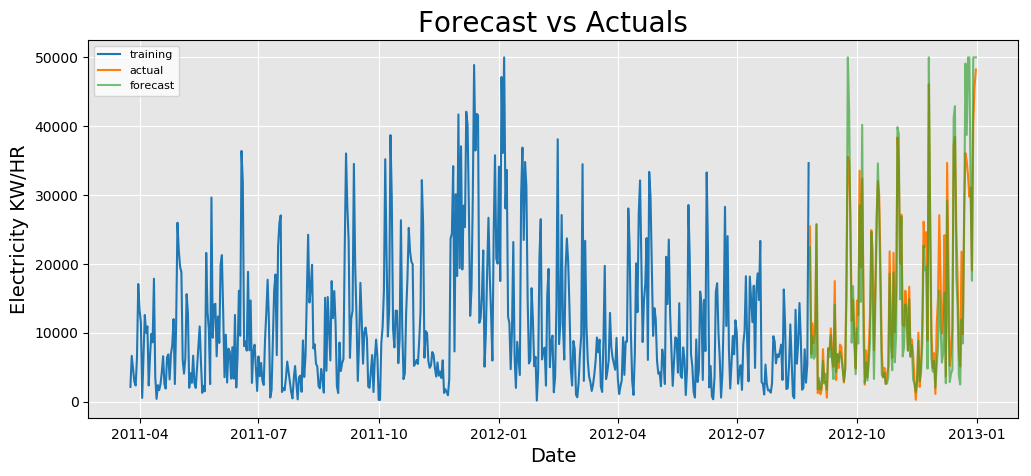

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
# draw solid white grid lines
plt.grid(color='w', linestyle='solid')
plt.plot(train, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast2, label='forecast', alpha = 0.65)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Electricity KW/HR', fontsize = 14)
plt.title('Forecast vs Actuals', fontsize = 20)
plt.legend(loc='upper left', fontsize=8)


plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual.values, forecast2.values)
rmse = np.sqrt(mse)
rmse

4607.389558985641

In [24]:
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast2.values)
r2

0.853370017869172

In [28]:
exo_nox = wind_df.Wind_Speed_AVG
#exo_nox = pd.DataFrame(scaler.transform(wind_df))
train_exo_nox = np.array(exo_nox[0:514])
test_exo_nox = np.array(exo_nox[514:])

In [29]:
model_nox = SARIMAX(train_time, exog=train_exo_nox, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))

In [30]:
model_fit_nox = model_nox.fit(disp=True)
fc_nox = model_fit_nox.forecast(128, alpha=0.05, exog = pd.DataFrame(test_exo_nox) )

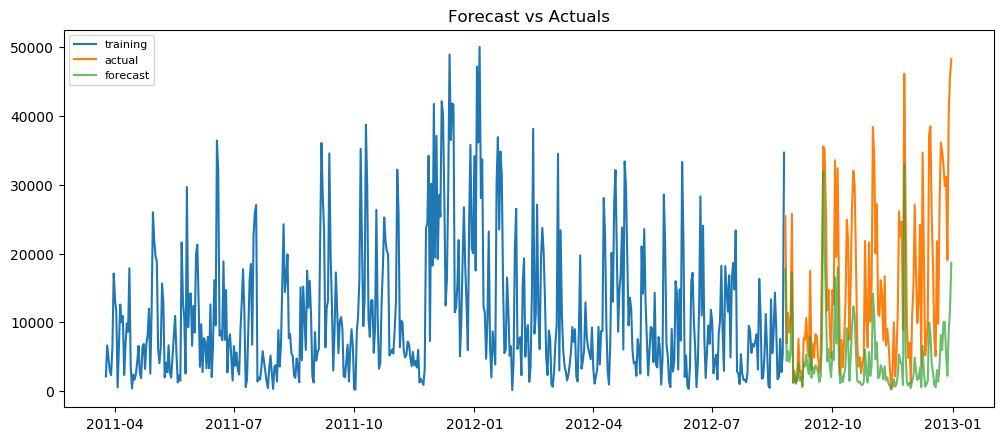

In [31]:
actual = pd.DataFrame(np.exp(test_time))
actual.index = time.Date_Time[514:]
forecast = pd.DataFrame(np.exp(fc_nox))
forecast.index = actual.index
train= pd.DataFrame(np.exp(train_time))
train.index = time.Date_Time[:514]

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

13200.673974180392
0.5051486830151899
